In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

In [84]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


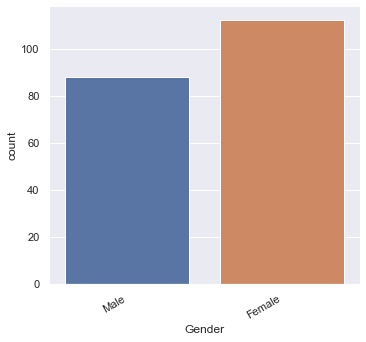

In [85]:
ax = sns.catplot(x='Gender',kind='count',data=df,orient="h")
ax.fig.autofmt_xdate()

Text(0.5, 1, 'Relation btween Age and Annual Income')

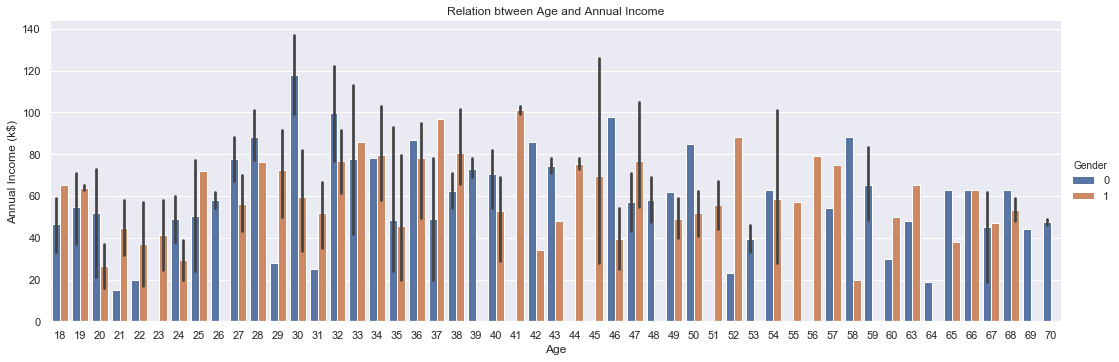

In [110]:
sns.set(style="darkgrid")
sns.catplot(x = "Age", y = "Annual Income (k$)", kind = 'bar', hue= 'Gender', data = df, height=5, aspect=3)
plt.title('Relation btween Age and Annual Income')

Text(0.5, 1, 'Relation btween Age and Spending Score')

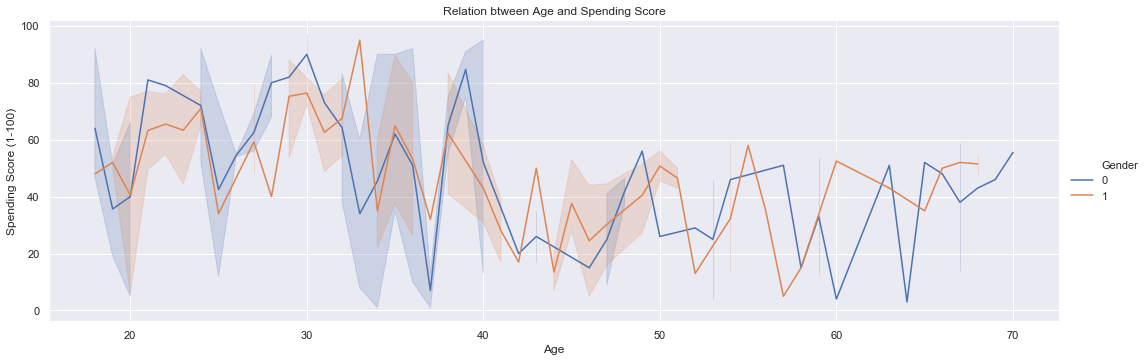

In [111]:
sns.set(style="darkgrid")
sns.relplot(x = "Age", y = "Spending Score (1-100)", kind = 'line', hue= 'Gender', data = df, height=5, aspect=3)
plt.title('Relation btween Age and Spending Score')

In [88]:
y = df.iloc[:, -1]
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [89]:
df.Gender[df.Gender == "Male"] = 0
df.Gender[df.Gender == 'Female'] = 1
print(df)

     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1      0   19                  15                      39
1             2      0   21                  15                      81
2             3      1   20                  16                       6
3             4      1   23                  16                      77
4             5      1   31                  17                      40
..          ...    ...  ...                 ...                     ...
195         196      1   35                 120                      79
196         197      1   45                 126                      28
197         198      0   32                 126                      74
198         199      0   32                 137                      18
199         200      0   30                 137                      83

[200 rows x 5 columns]


C:\Users\Muniza\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Muniza\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
x = df.iloc[:,0:4]
x

,CustomerID,Gender,Age,Annual Income (k$)
0,1,0,19,15
1,2,0,21,15
2,3,1,20,16
3,4,1,23,16
4,5,1,31,17
...,...,...,...,...
195,196,1,35,120
196,197,1,45,126
197,198,0,32,126
198,199,0,32,137


In [91]:
kmeans = KMeans(5)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [92]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [93]:
data_with_clusters = df.copy()
# Create a new column and add the identified cluster array in the dataset
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,1
3,4,1,23,16,77,1
4,5,1,31,17,40,1
...,...,...,...,...,...,...
195,196,1,35,120,79,2
196,197,1,45,126,28,2
197,198,0,32,126,74,2
198,199,0,32,137,18,2


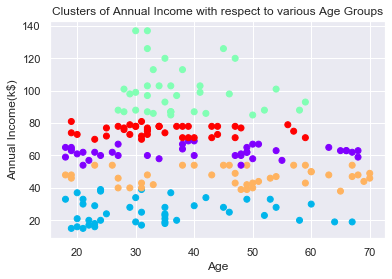

In [102]:
plt.scatter(data_with_clusters['Age'],data_with_clusters['Annual Income (k$)'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.title('Clusters of Annual Income with respect to various Age Groups')  
plt.xlabel('Age')  
plt.ylabel('Annual Income(k$)')
plt.show()

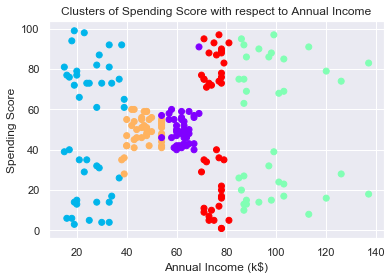

In [101]:
plt.scatter(data_with_clusters['Annual Income (k$)'],data_with_clusters['Spending Score (1-100)'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.title('Clusters of Spending Score with respect to Annual Income')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score')
plt.show()